***The project will require you to research and propose a sentiment analysis algorithm for text. You will need to use at least two public datasets, three machine learning algorithms, and two deep learning algorithms. You will also need to use augmentation techniques, normalization, and different types of loss functions.***

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
cd '/content/drive/MyDrive/chatGPT'

/content/drive/MyDrive/chatGPT


### **Download libraries**

In [3]:
import nltk
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping grammars/basque_grammars.zip.
[nltk_data]    | Downloading package bcp47 to /root/nltk_data...
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   U

True

In [4]:
import numpy as np
import pandas as pd
import spacy
import re

from sklearn.utils import shuffle
from string import punctuation
from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.calibration import CalibratedClassifierCV
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from nltk.tokenize import word_tokenize
from nltk.stem import SnowballStemmer, WordNetLemmatizer, PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer as tf
from wordcloud import WordCloud
from nltk.corpus import stopwords
from sklearn.utils import resample

from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC, LinearSVC
import xgboost as xgb
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import auc, roc_curve
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay

import matplotlib.pyplot as plt
import seaborn as sns


In [5]:
!pip install KerasTokenizer

ERROR: Could not find a version that satisfies the requirement KerasTokenizer (from versions: none)
ERROR: No matching distribution found for KerasTokenizer


In [6]:
from tensorflow.keras.preprocessing.text import Tokenizer

In [7]:
!python -m spacy download en_core_web_md
nlp = spacy.load("en_core_web_md")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.8/42.8 MB 7.1 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_md')


### **Loading Dataset**

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/chatGPT/file.csv")
data = data.drop([data.columns[0]], axis=1)
data.values[:5].tolist()

[['ChatGPT: Optimizing Language Models for Dialogue https://t.co/K9rKRygYyn @OpenAI',
  'neutral'],
 ['Try talking with ChatGPT, our new AI system which is optimized for dialogue. Your feedback will help us improve it. https://t.co/sHDm57g3Kr',
  'good'],
 ['ChatGPT: Optimizing Language Models for Dialogue https://t.co/GLEbMoKN6w #AI #MachineLearning #DataScience #ArtificialIntelligence\\n\\nTrending AI/ML Article Identified &amp; Digested via Granola; a Machine-Driven RSS Bot by Ramsey Elbasheer https://t.co/RprmAXUp34',
  'neutral'],
 ['THRILLED to share that ChatGPT, our new model optimized for dialog, is now public, free, and accessible to everyone. https://t.co/dyvtHecYbd https://t.co/DdhzhqhCBX https://t.co/l8qTLure71',
  'good'],
 ['As of 2 minutes ago, @OpenAI released their new ChatGPT. \\n\\nAnd you can use it right now 👇 https://t.co/VyPGPNw988 https://t.co/cSn5h6h1M1',
  'bad']]

In [ ]:
# Display information of dataframe:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 219294 entries, 0 to 219293
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   tweets  219294 non-null  object
 1   labels  219294 non-null  object
dtypes: object(2)
memory usage: 3.3+ MB


In [ ]:
# Display header of dataframe.
data.head()

,tweets,labels
0,ChatGPT: Optimizing Language Models for Dialog...,neutral
1,"Try talking with ChatGPT, our new AI system wh...",good
2,ChatGPT: Optimizing Language Models for Dialog...,neutral
3,"THRILLED to share that ChatGPT, our new model ...",good
4,"As of 2 minutes ago, @OpenAI released their ne...",bad


In [ ]:
data.describe()

,tweets,labels
count,219294,219294
unique,217622,3
top,ChatGPT,bad
freq,122,107796


In [ ]:
data['labels'].value_counts()

bad        107796
good        56011
neutral     55487
Name: labels, dtype: int64

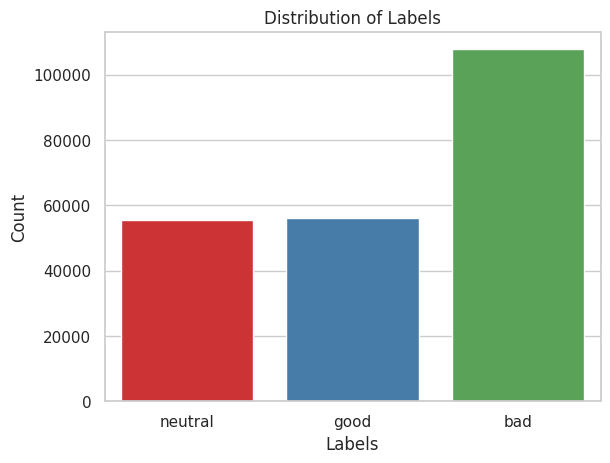

In [ ]:
sns.set(style="whitegrid")

sns.countplot(data=data, x='labels', hue='labels', palette='Set1')

# Customize plot labels and title if needed:
plt.xlabel('Labels')
plt.ylabel('Count')
plt.title('Distribution of Labels')

# Show the plot:
plt.show()

Drop duplicated values

In [ ]:
print("Duplicated values: " , data.duplicated().sum())

data.drop_duplicates(inplace=True)
data = data.dropna(axis=0)
print(data.info())

Duplicated values:  1671
<class 'pandas.core.frame.DataFrame'>
Int64Index: 217623 entries, 0 to 219293
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   tweets  217623 non-null  object
 1   labels  217623 non-null  object
dtypes: object(2)
memory usage: 5.0+ MB
None


In [ ]:
class_0 = data[data["labels"] == "neutral"]
class_1 = data[data["labels"] == "good"]
class_neg = data[data["labels"] == "bad"]
class_neg  = class_neg.iloc[:70000]
data = pd.concat([class_neg , class_0 , class_1])

data.head()

,tweets,labels
4,"As of 2 minutes ago, @OpenAI released their ne...",bad
6,"As of 2 minutes ago, @OpenAI released their ne...",bad
10,GOD DAMN IT @OpenAI STOP ANNOUNCING THINGS I A...,bad
17,#ai Models are set to become the search engine...,bad
39,Google is done.\n\nCompare the quality of thes...,bad


In [ ]:
data["labels"].value_counts()

bad        70000
good       55754
neutral    55174
Name: labels, dtype: int64

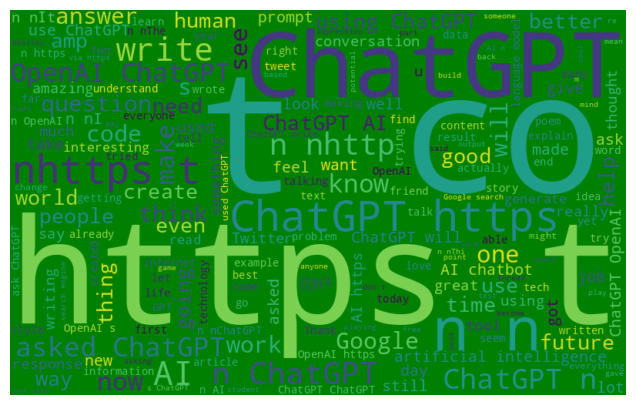

In [ ]:
text_data = data['tweets'].str.cat(sep=' ')
wordcloud = WordCloud(width=800, height=500, background_color='green').generate(text_data)

plt.figure(figsize=(8, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

### **Preprocessing**

In [ ]:
stop_words = set(stopwords.words('english'))
st = PorterStemmer()
lem = WordNetLemmatizer()

def is_alpha(word):
    for part in word.split('-'):
        if not part.isalpha():
            return False

    return True

def clean_dataset(text):
    text = re.sub(r'http\S+', '', text) # removing links
    text = re.sub(r'\\n', ' ', text) # removing \\n
    text = re.sub(r"\s*#\S+", "", text) # removing hash tags
    text = re.sub(r"\s*@\S+", "", text) # removing @
    text = text.lower()
    words = [word for word in word_tokenize(text) if is_alpha(word)]
    #words = [st.stem(word) for word in words]
    words = [lem.lemmatize(word) for word in words]

    # text = " ".join([word for word in text.split(" ") if is_alpha(word)])
    # text = re.sub(r'[^a-zA-Z\s]', '', text, re.I|re.A)
    words = [w for w in words if not w in stop_words]
    text = " ".join(words)

    return text.strip()

data.insert(len(data.columns)-1, "cleaned_tweets", data['tweets'].apply(clean_dataset))
data.head()

,tweets,cleaned_tweets,labels
4,"As of 2 minutes ago, @OpenAI released their ne...",minute ago released new chatgpt use right,bad
6,"As of 2 minutes ago, @OpenAI released their ne...",minute ago released new chatgpt use right,bad
10,GOD DAMN IT @OpenAI STOP ANNOUNCING THINGS I A...,god damn stop announcing thing busy,bad
17,#ai Models are set to become the search engine...,model set become search engine future atm stil...,bad
39,Google is done.\n\nCompare the quality of thes...,google done compare quality response chatgpt,bad


In [ ]:
from numpy.core import numeric
#@title ***Converting text to numerical form***

import math
import collections
from tensorflow.keras.preprocessing.sequence import pad_sequences

def convert_text_to_numerical(text):
    num_words = 7000
    tokenizer = Tokenizer(num_words=num_words)
    tokenizer.fit_on_texts(text)
    sequences = tokenizer.texts_to_sequences(text)

    #maxlen = max(45, math.ceil(np.average([len(seq) for seq in sequences])))
    maxlen = 140


    pad_seqs = pad_sequences(sequences, maxlen=maxlen)
    pad_seqs_todrop = []
    for i, p in enumerate(pad_seqs):
        if sum(p) == sum(sorted(p, reverse=True)[0:2]):
            pad_seqs_todrop.append(i)

    return pad_seqs, pad_seqs_todrop, tokenizer, num_words, maxlen

data = data.reset_index()
numeric_tweets, rows_todrop, tokenizer, num_words, maxlen = convert_text_to_numerical(data['cleaned_tweets'])
data.insert(len(data.columns)-1, "numeric_tweets", numeric_tweets.tolist())
data.head()

,index,tweets,cleaned_tweets,numeric_tweets,labels
0,4,"As of 2 minutes ago, @OpenAI released their ne...",minute ago released new chatgpt use right,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",bad
1,6,"As of 2 minutes ago, @OpenAI released their ne...",minute ago released new chatgpt use right,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",bad
2,10,GOD DAMN IT @OpenAI STOP ANNOUNCING THINGS I A...,god damn stop announcing thing busy,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",bad
3,17,#ai Models are set to become the search engine...,model set become search engine future atm stil...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",bad
4,39,Google is done.\n\nCompare the quality of thes...,google done compare quality response chatgpt,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",bad


Encode output labes

In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
data.insert(len(data.columns), "encoded_labels", label_encoder.fit_transform(data['labels']))
print(label_encoder.classes_)
data.head()

['bad' 'good' 'neutral']


,index,tweets,cleaned_tweets,numeric_tweets,labels,encoded_labels
0,4,"As of 2 minutes ago, @OpenAI released their ne...",minute ago released new chatgpt use right,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",bad,0
1,6,"As of 2 minutes ago, @OpenAI released their ne...",minute ago released new chatgpt use right,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",bad,0
2,10,GOD DAMN IT @OpenAI STOP ANNOUNCING THINGS I A...,god damn stop announcing thing busy,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",bad,0
3,17,#ai Models are set to become the search engine...,model set become search engine future atm stil...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",bad,0
4,39,Google is done.\n\nCompare the quality of thes...,google done compare quality response chatgpt,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",bad,0


In [ ]:
final_data = data.drop(rows_todrop, inplace=False)
print(len(data), len(final_data))
final_data.head()

180928 167734


,index,tweets,cleaned_tweets,numeric_tweets,labels,encoded_labels
0,4,"As of 2 minutes ago, @OpenAI released their ne...",minute ago released new chatgpt use right,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",bad,0
1,6,"As of 2 minutes ago, @OpenAI released their ne...",minute ago released new chatgpt use right,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",bad,0
2,10,GOD DAMN IT @OpenAI STOP ANNOUNCING THINGS I A...,god damn stop announcing thing busy,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",bad,0
3,17,#ai Models are set to become the search engine...,model set become search engine future atm stil...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",bad,0
4,39,Google is done.\n\nCompare the quality of thes...,google done compare quality response chatgpt,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",bad,0


### **Split Data**

In [ ]:
inputs = final_data[['tweets', 'cleaned_tweets', 'numeric_tweets']]
outputs = final_data[['labels', 'encoded_labels']]

in_train, in_test, out_train, out_test = train_test_split(inputs, outputs, test_size=0.25, shuffle=True, random_state=42)

X_train = in_train['numeric_tweets']
X_test = in_test['numeric_tweets']
y_train = out_train['encoded_labels']
y_test = out_test['encoded_labels']

In [ ]:
X_train = np.asarray(X_train.tolist())
X_train = X_train.astype(np.int32)
X_test = np.asarray(X_test.tolist()).astype(np.int32)
y_train = np.asarray(y_train.tolist()).astype(np.int32)
y_test = np.asarray(y_test.tolist()).astype(np.int32)
type(X_train)

numpy.ndarray

### **Machine Learning Models**

In [ ]:
n_components = 100
svd = TruncatedSVD(n_components=n_components)

X_train_pca = svd.fit_transform(X_train)
X_validation_pca = svd.transform(X_test)
X_test_pca = svd.transform(X_test)

#### ***Support Vector Machine***

In [ ]:
clf = SVC()
clf.fit(X_train_pca, y_train)
y_pred = clf.predict(X_test_pca)

accuracy = accuracy_score(y_test, y_pred)
print(f"DecisionTree:{accuracy * 100:.2f}%")

precision = precision_score(y_test, y_pred, average='macro')
print(f"DecisionTree - Precision: {precision * 100:.2f}%")

recall = recall_score(y_test, y_pred, average='macro')
print(f"DecisionTree:{recall * 100:.2f}%")

f1 = f1_score(y_test, y_pred, average='macro')
print(f"DecisionTree F1:{f1 * 100:.2f}%")

DecisionTree:46.30%
DecisionTree - Precision: 44.70%
DecisionTree:45.05%
DecisionTree F1:40.63%


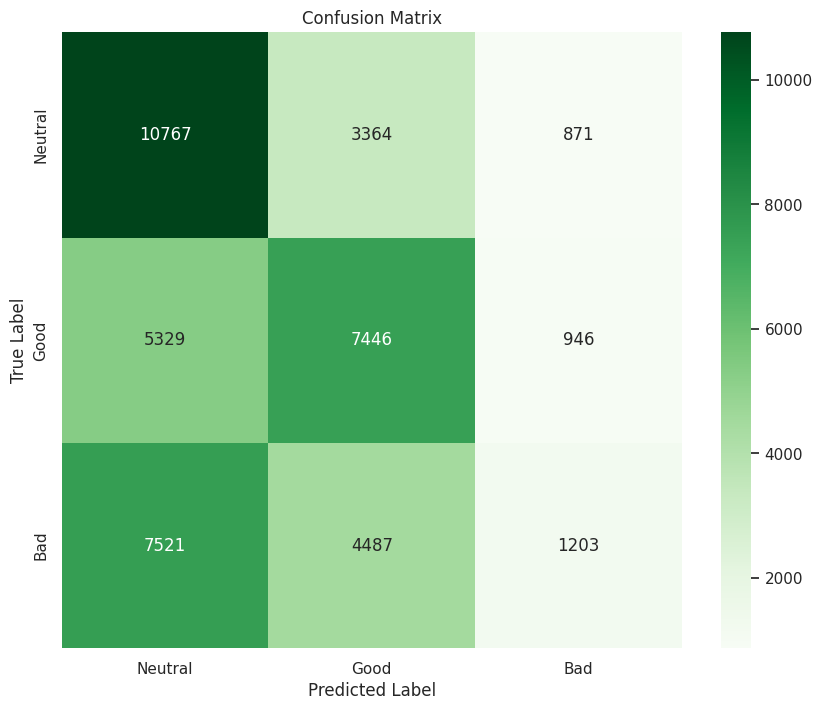

In [ ]:
label = ['Neutral', 'Good', 'Bad']

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', xticklabels=label, yticklabels=label)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

#### ***Decision Tree***

In [ ]:
clf = DecisionTreeClassifier()
clf.fit(X_train_pca, y_train)
y_pred = clf.predict(X_test_pca)

accuracy = accuracy_score(y_test, y_pred)
print(f"DecisionTree:{accuracy * 100:.2f}%")

precision = precision_score(y_test, y_pred, average='macro')
print(f"DecisionTree - Precision: {precision * 100:.2f}%")

recall = recall_score(y_test, y_pred, average='macro')
print(f"DecisionTree:{recall * 100:.2f}%")

f1 = f1_score(y_test, y_pred, average='macro')
print(f"DecisionTree F1:{f1 * 100:.2f}%")

DecisionTree:45.87%
DecisionTree - Precision: 45.66%
DecisionTree:45.65%
DecisionTree F1:45.65%


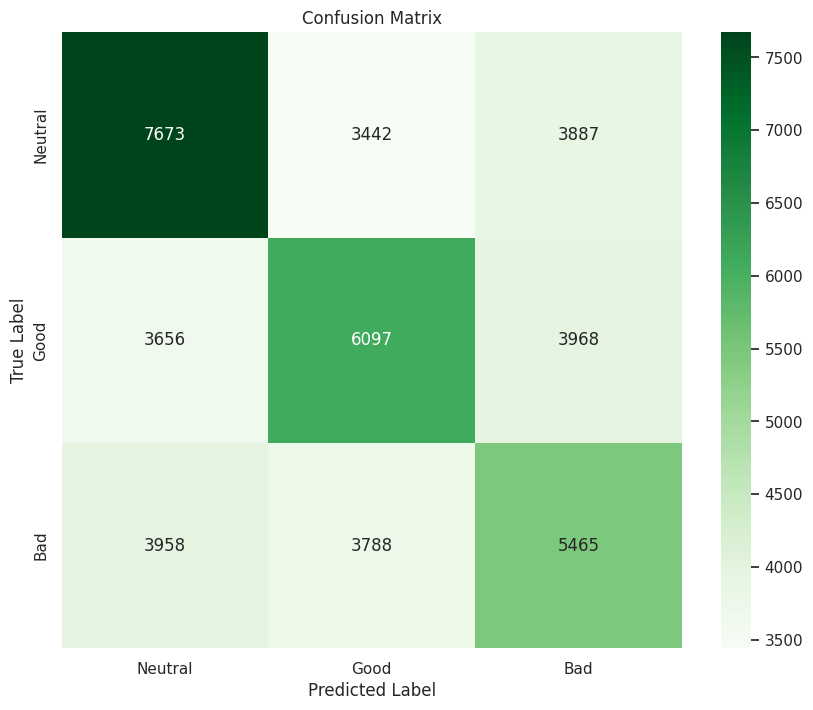

In [ ]:
label = ['Neutral', 'Good', 'Bad']

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', xticklabels=label, yticklabels=label)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

#### ***XGBosst***

In [ ]:
clf = xgb.XGBClassifier()
clf.fit(X_train_pca, y_train)
y_pred = clf.predict(X_test_pca)

accuracy = accuracy_score(y_test, y_pred)
print(f"XGBoost - Accuracy: {accuracy * 100:.2f}%")

precision = precision_score(y_test, y_pred, average='macro')
print(f"XGBoost - Precision: {precision * 100:.2f}%")

recall = recall_score(y_test, y_pred, average='macro')
print(f"XGBoost - Recall: {recall * 100:.2f}%")

f1 = f1_score(y_test, y_pred, average='macro')
print(f"XGBoost - F1: {f1 * 100:.2f}%")

XGBoost - Accuracy: 50.27%
XGBoost - Precision: 49.38%
XGBoost - Recall: 49.53%
XGBoost - F1: 48.36%


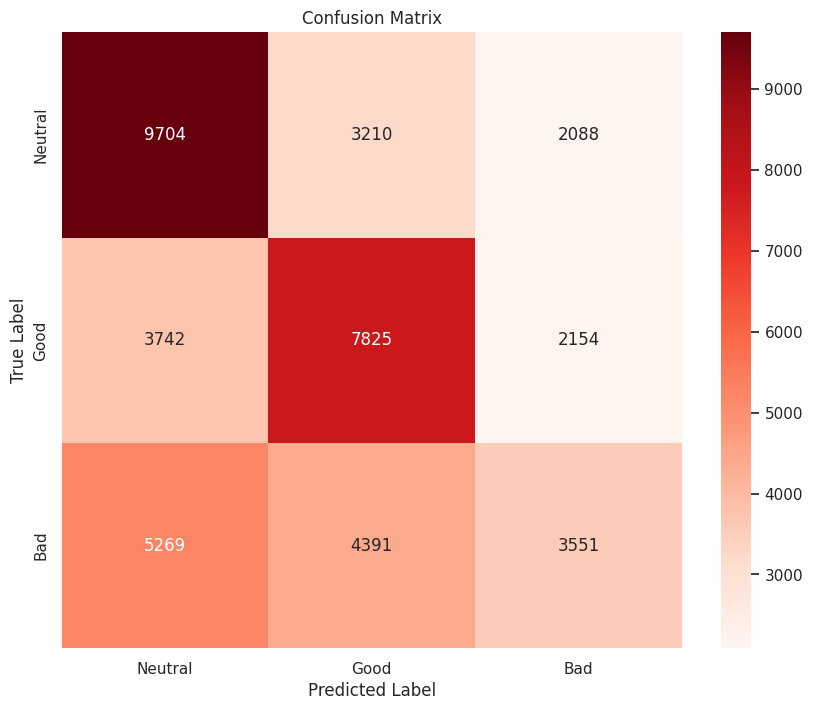

In [ ]:
label = ['Neutral', 'Good', 'Bad']

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', xticklabels=label, yticklabels=label)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

#### ***Random Forest***

In [ ]:
clf = RandomForestClassifier(max_depth=19, random_state=42)
clf.fit(X_train_pca, y_train)
y_pred = clf.predict(X_test_pca)

accuracy = accuracy_score(y_test, y_pred)
print(f"XGBoost - Accuracy: {accuracy * 100:.2f}%")

precision = precision_score(y_test, y_pred, average='macro')
print(f"XGBoost - Precision: {precision * 100:.2f}%")

recall = recall_score(y_test, y_pred, average='macro')
print(f"XGBoost - Recall: {recall * 100:.2f}%")

f1 = f1_score(y_test, y_pred, average='macro')
print(f"XGBoost - F1: {f1 * 100:.2f}%")

XGBoost - Accuracy: 52.05%
XGBoost - Precision: 51.73%
XGBoost - Recall: 51.28%
XGBoost - F1: 49.72%


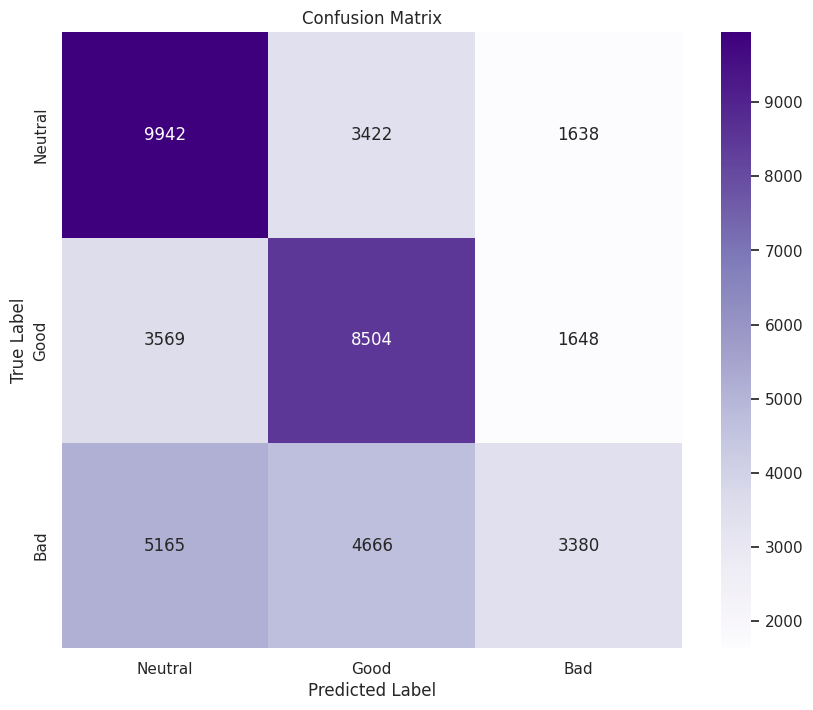

In [ ]:
label = ['Neutral', 'Good', 'Bad']

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Purples', xticklabels=label, yticklabels=label)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

### **Deep Learning Models**

In [8]:
from keras.preprocessing.text import Tokenizer
from keras.utils import pad_sequences
from keras import Sequential
from keras.utils import to_categorical
from keras.layers import Dense,SimpleRNN,Embedding,Flatten

In [9]:
data = pd.read_csv("/content/drive/MyDrive/chatGPT/file.csv")
data = data.drop([data.columns[0]], axis=1)
data.values[:5].tolist()

[['ChatGPT: Optimizing Language Models for Dialogue https://t.co/K9rKRygYyn @OpenAI',
  'neutral'],
 ['Try talking with ChatGPT, our new AI system which is optimized for dialogue. Your feedback will help us improve it. https://t.co/sHDm57g3Kr',
  'good'],
 ['ChatGPT: Optimizing Language Models for Dialogue https://t.co/GLEbMoKN6w #AI #MachineLearning #DataScience #ArtificialIntelligence\\n\\nTrending AI/ML Article Identified &amp; Digested via Granola; a Machine-Driven RSS Bot by Ramsey Elbasheer https://t.co/RprmAXUp34',
  'neutral'],
 ['THRILLED to share that ChatGPT, our new model optimized for dialog, is now public, free, and accessible to everyone. https://t.co/dyvtHecYbd https://t.co/DdhzhqhCBX https://t.co/l8qTLure71',
  'good'],
 ['As of 2 minutes ago, @OpenAI released their new ChatGPT. \\n\\nAnd you can use it right now 👇 https://t.co/VyPGPNw988 https://t.co/cSn5h6h1M1',
  'bad']]

In [10]:
class_0 = data[data["labels"] == "neutral"]
class_1 = data[data["labels"] == "good"]
class_neg = data[data["labels"] == "bad"]
class_neg  = class_neg.iloc[:70000]
data = pd.concat([class_neg , class_0 , class_1])

data.head()

,tweets,labels
4,"As of 2 minutes ago, @OpenAI released their ne...",bad
6,"As of 2 minutes ago, @OpenAI released their ne...",bad
10,GOD DAMN IT @OpenAI STOP ANNOUNCING THINGS I A...,bad
17,#ai Models are set to become the search engine...,bad
39,Google is done.\n\nCompare the quality of thes...,bad


In [11]:
stop_words = set(stopwords.words('english'))
st = PorterStemmer()
lem = WordNetLemmatizer()

def is_alpha(word):
    for part in word.split('-'):
        if not part.isalpha():
            return False

    return True

def clean_dataset(text):
    text = re.sub(r'http\S+', '', text) # removing links
    text = re.sub(r'\\n', ' ', text) # removing \\n
    text = re.sub(r"\s*#\S+", "", text) # removing hash tags
    text = re.sub(r"\s*@\S+", "", text) # removing @
    text = text.lower()
    words = [word for word in word_tokenize(text) if is_alpha(word)]
    #words = [st.stem(word) for word in words]
    words = [lem.lemmatize(word) for word in words]

    # text = " ".join([word for word in text.split(" ") if is_alpha(word)])
    # text = re.sub(r'[^a-zA-Z\s]', '', text, re.I|re.A)
    words = [w for w in words if not w in stop_words]
    text = " ".join(words)

    return text.strip()

data.insert(len(data.columns)-1, "cleaned_tweets", data['tweets'].apply(clean_dataset))
data.head()

,tweets,cleaned_tweets,labels
4,"As of 2 minutes ago, @OpenAI released their ne...",minute ago released new chatgpt use right,bad
6,"As of 2 minutes ago, @OpenAI released their ne...",minute ago released new chatgpt use right,bad
10,GOD DAMN IT @OpenAI STOP ANNOUNCING THINGS I A...,god damn stop announcing thing busy,bad
17,#ai Models are set to become the search engine...,model set become search engine future atm stil...,bad
39,Google is done.\n\nCompare the quality of thes...,google done compare quality response chatgpt,bad


In [12]:
from numpy.core import numeric
#@title ***Converting text to numerical form***

import math
import collections

def convert_text_to_numerical(text):
    num_words = 7000
    tokenizer = Tokenizer(num_words=num_words)
    tokenizer.fit_on_texts(text)
    sequences = tokenizer.texts_to_sequences(text)

    #maxlen = max(45, math.ceil(np.average([len(seq) for seq in sequences])))
    maxlen = 140


    pad_seqs = pad_sequences(sequences, maxlen=maxlen)
    pad_seqs_todrop = []
    for i, p in enumerate(pad_seqs):
        if sum(p) == sum(sorted(p, reverse=True)[0:2]):
            pad_seqs_todrop.append(i)

    return pad_seqs, pad_seqs_todrop, tokenizer, num_words, maxlen

data = data.reset_index()
numeric_tweets, rows_todrop, tokenizer, num_words, maxlen = convert_text_to_numerical(data['cleaned_tweets'])
data.insert(len(data.columns)-1, "numeric_tweets", numeric_tweets.tolist())
data.head()

,index,tweets,cleaned_tweets,numeric_tweets,labels
0,4,"As of 2 minutes ago, @OpenAI released their ne...",minute ago released new chatgpt use right,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",bad
1,6,"As of 2 minutes ago, @OpenAI released their ne...",minute ago released new chatgpt use right,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",bad
2,10,GOD DAMN IT @OpenAI STOP ANNOUNCING THINGS I A...,god damn stop announcing thing busy,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",bad
3,17,#ai Models are set to become the search engine...,model set become search engine future atm stil...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",bad
4,39,Google is done.\n\nCompare the quality of thes...,google done compare quality response chatgpt,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",bad


In [14]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
data.insert(len(data.columns), "encoded_labels", label_encoder.fit_transform(data['labels']))
print(label_encoder.classes_)
data.head()

['bad' 'good' 'neutral']


,index,tweets,cleaned_tweets,numeric_tweets,labels,encoded_labels
0,4,"As of 2 minutes ago, @OpenAI released their ne...",minute ago released new chatgpt use right,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",bad,0
1,6,"As of 2 minutes ago, @OpenAI released their ne...",minute ago released new chatgpt use right,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",bad,0
2,10,GOD DAMN IT @OpenAI STOP ANNOUNCING THINGS I A...,god damn stop announcing thing busy,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",bad,0
3,17,#ai Models are set to become the search engine...,model set become search engine future atm stil...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",bad,0
4,39,Google is done.\n\nCompare the quality of thes...,google done compare quality response chatgpt,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",bad,0


In [15]:
final_data = data.drop(rows_todrop, inplace=False)
print(len(data), len(final_data))
final_data.head()

181498 167876


,index,tweets,cleaned_tweets,numeric_tweets,labels,encoded_labels
0,4,"As of 2 minutes ago, @OpenAI released their ne...",minute ago released new chatgpt use right,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",bad,0
1,6,"As of 2 minutes ago, @OpenAI released their ne...",minute ago released new chatgpt use right,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",bad,0
2,10,GOD DAMN IT @OpenAI STOP ANNOUNCING THINGS I A...,god damn stop announcing thing busy,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",bad,0
3,17,#ai Models are set to become the search engine...,model set become search engine future atm stil...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",bad,0
4,39,Google is done.\n\nCompare the quality of thes...,google done compare quality response chatgpt,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",bad,0


In [16]:
inputs = final_data[['tweets', 'cleaned_tweets', 'numeric_tweets']]
outputs = final_data[['labels', 'encoded_labels']]

in_train, in_test, out_train, out_test = train_test_split(inputs, outputs, test_size=0.2, shuffle=True, random_state=42)

X_train = in_train['numeric_tweets']
X_test = in_test['numeric_tweets']
y_train = out_train['encoded_labels']
y_test = out_test['encoded_labels']

In [17]:
X_train = np.asarray(X_train.tolist())
X_train = X_train.astype(np.int32)
X_test = np.asarray(X_test.tolist()).astype(np.int32)
y_train = np.asarray(y_train.tolist()).astype(np.int32)
y_test = np.asarray(y_test.tolist()).astype(np.int32)
type(X_train)

numpy.ndarray

In [18]:
# Tokenize the input text
tokenizer = Tokenizer(num_words=7000)
tokenizer.fit_on_texts(data["tweets"])


# Pad the sequences to a fixed length
max_len = 140

In [19]:
# Tokenize the input text
tokenizer = Tokenizer(num_words=7000)
tokenizer.fit_on_texts(data["tweets"])


# Pad the sequences to a fixed length
max_len = 140

# Load pre-trained word embeddings
embedding_dim = 100
embeddings_index = {}
with open('/content/drive/MyDrive/chatGPT/glove.6B.100d.txt', encoding='utf8') as f:
    for line in f:
        values = line.split()
        word = values[0]
        coefs = np.asarray(values[1:], dtype='float32')
        embeddings_index[word] = coefs

# Create an embedding matrix for the tokenizer
word_index = tokenizer.word_index
#num_words = min(len(word_index), 7000)
num_words =  7000
embedding_matrix = np.zeros((num_words, embedding_dim))
for word, i in word_index.items():
    if i >= num_words:
        continue
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

# Convert the output labels to one-hot encoded vectors
y_train_en = to_categorical(y_train)
y_test_en = to_categorical(y_test)

#### ***LSTM***

In [20]:
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense
from keras.callbacks import EarlyStopping

# Create the model
model2 = Sequential()
model2.add(Embedding(num_words, embedding_dim, input_length=max_len, weights=[embedding_matrix], trainable=True))
model2.add(LSTM(64, dropout=0.3, recurrent_dropout=0.3))
model2.add(Dense(3, activation='softmax'))
#model2.add(Dense(3, activation='relu'))


# Compile the model
model2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
#model2.fit(X_train, y_train_onehot, validation_data=(X_test, y_test_onehot), epochs=10, batch_size=1024)
history2 = model2.fit(X_train, y_train_en, epochs=10, batch_size=1024, validation_split=0.1, callbacks=[EarlyStopping(monitor='val_loss', patience=3, min_delta=0.001)])

Epoch 1/10
119/119 [==============================] - 318s 3s/step - loss: 0.9618 - accuracy: 0.5189 - val_loss: 0.8684 - val_accuracy: 0.5853
Epoch 2/10
119/119 [==============================] - 311s 3s/step - loss: 0.6780 - accuracy: 0.7060 - val_loss: 0.5401 - val_accuracy: 0.7882
Epoch 3/10
119/119 [==============================] - 314s 3s/step - loss: 0.5099 - accuracy: 0.8010 - val_loss: 0.4711 - val_accuracy: 0.8276
Epoch 4/10
119/119 [==============================] - 311s 3s/step - loss: 0.4384 - accuracy: 0.8367 - val_loss: 0.4080 - val_accuracy: 0.8580
Epoch 5/10
119/119 [==============================] - 313s 3s/step - loss: 0.3920 - accuracy: 0.8594 - val_loss: 0.3771 - val_accuracy: 0.8690
Epoch 6/10
119/119 [==============================] - 306s 3s/step - loss: 0.3616 - accuracy: 0.8735 - val_loss: 0.3652 - val_accuracy: 0.8774
Epoch 7/10
119/119 [==============================] - 307s 3s/step - loss: 0.3432 - accuracy: 0.8819 - val_loss: 0.3540 - val_accuracy: 0.8850

In [21]:
def get_measurements(true_y, pred_y, average='micro'):
    return {
      "accuracy": accuracy_score(true_y, pred_y),
      "recall": recall_score(true_y, pred_y, average=average),
      "precision": precision_score(true_y, pred_y, average=average),
      "fscore": f1_score(true_y, pred_y, average=average),
  }

predicted_labels = model2.predict(X_test, verbose=1)
get_measurements(y_test,  np.argmax(predicted_labels, axis=1))

1050/1050 [==============================] - 39s 37ms/step


{'accuracy': 0.8958482249225638,
 'recall': 0.8958482249225638,
 'precision': 0.8958482249225638,
 'fscore': 0.8958482249225638}

In [22]:
def predict_user_input(tweets , model):
    data = pd.DataFrame({ 'Tweets': tweets })
    cleaned_data = data['Tweets'].apply(clean_dataset)
    sequences = tokenizer.texts_to_sequences(cleaned_data)
    pad_seqs = pad_sequences(sequences, maxlen=maxlen)
    predicted_labels = model.predict(pad_seqs)
    data['labels'] = [ label_encoder.classes_[label_num] for label_num in np.argmax(predicted_labels, axis=1)]
    #print(data)
    return predicted_labels, data

print(predict_user_input([
    'chatgpt is very crazy !',
    'chatgpt is kind a dangerous',
    'woooow, chatgt is really impressive !!!',
    "chatgpt is an AI tool",
    "good results"] , model2))

print("")

print(predict_user_input([
    "The worst result, I did not expect that unwanted results. it is a useless tool",
    "my name is ahmed i want to became a data scientist",
    'woooow, chatgpt is really impressive i can not imagine how chatgpt generate solution like humans  ',
    "chatgpt is an AI helpful tool to help solve complex problems and take less time than traditional way i like it",
    "good results when i use this tool i like it and it helped me and better than google"
] , model2) )

1/1 [==============================] - 0s 39ms/step
(array([[0.9832895 , 0.00258445, 0.01412604],
       [0.9859847 , 0.00280274, 0.01121256],
       [0.97597086, 0.00282345, 0.02120575],
       [0.01173166, 0.01247567, 0.9757926 ],
       [0.98569643, 0.00258879, 0.01171484]], dtype=float32),                                     Tweets   labels
0                  chatgpt is very crazy !      bad
1              chatgpt is kind a dangerous      bad
2  woooow, chatgt is really impressive !!!      bad
3                    chatgpt is an AI tool  neutral
4                             good results      bad)

1/1 [==============================] - 0s 40ms/step
(array([[1.5798884e-03, 9.8904991e-01, 9.3701752e-03],
       [3.1762704e-02, 7.0053786e-02, 8.9818347e-01],
       [9.9463838e-01, 3.8744663e-04, 4.9741212e-03],
       [7.8973673e-02, 3.4616938e-01, 5.7485694e-01],
       [9.6339470e-01, 3.7680836e-03, 3.2837268e-02]], dtype=float32),                                               Tweet

In [23]:
def plot_graphs(history, string):
    plt.plot(history.history[string])
    plt.plot(history.history['val_'+string])
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.legend([string, 'val_'+string])
    plt.show()


#### ***CNN***

In [25]:
!pip install tensorflow
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Embedding, Conv1D, MaxPooling1D, Flatten, Dense
from keras.callbacks import EarlyStopping

# The code is missing the keras.layers import statement. Add it before the model definition.

model1 = Sequential()
model1.add(Embedding(input_dim=num_words,output_dim=128, input_length=maxlen , trainable = True))

model1.add(Conv1D(filters=32, kernel_size=3, activation='relu'))
model1.add(MaxPooling1D(pool_size=2))
model1.add(Flatten())
model1.add(Dense(64, activation='relu'))
model1.add(Dense(3, activation='softmax'))

model1.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history1 = model1.fit(X_train, y_train, epochs=10, batch_size=1024, validation_split=0.1, callbacks=[EarlyStopping(monitor='val_loss', patience=3, min_delta=0.1)])

Epoch 1/10
119/119 [==============================] - 64s 535ms/step - loss: 0.7415 - accuracy: 0.6661 - val_loss: 0.5088 - val_accuracy: 0.8341
Epoch 2/10
119/119 [==============================] - 64s 536ms/step - loss: 0.4081 - accuracy: 0.8618 - val_loss: 0.3973 - val_accuracy: 0.8727
Epoch 3/10
119/119 [==============================] - 61s 515ms/step - loss: 0.3413 - accuracy: 0.8921 - val_loss: 0.3770 - val_accuracy: 0.8784
Epoch 4/10
119/119 [==============================] - 64s 540ms/step - loss: 0.3069 - accuracy: 0.9060 - val_loss: 0.3670 - val_accuracy: 0.8863
Epoch 5/10
119/119 [==============================] - 62s 522ms/step - loss: 0.2797 - accuracy: 0.9165 - val_loss: 0.3647 - val_accuracy: 0.8803


In [27]:
model1.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 140, 128)          896000    
                                                                 
 conv1d (Conv1D)             (None, 138, 32)           12320     
                                                                 
 max_pooling1d (MaxPooling1  (None, 69, 32)            0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 2208)              0         
                                                                 
 dense_1 (Dense)             (None, 64)                141376    
                                                                 
 dense_2 (Dense)             (None, 3)                 195       
                                                      

In [28]:
def get_measurements(true_y, pred_y, average='micro'):
    return {
      "accuracy": accuracy_score(true_y, pred_y),
      "recall": recall_score(true_y, pred_y, average=average),
      "precision": precision_score(true_y, pred_y, average=average),
      "fscore": f1_score(true_y, pred_y, average=average),
  }
predicted_labels = model1.predict(X_test, verbose=1)
get_measurements(y_test,  np.argmax(predicted_labels, axis=1))

1050/1050 [==============================] - 8s 7ms/step


{'accuracy': 0.8860495592089588,
 'recall': 0.8860495592089588,
 'precision': 0.8860495592089588,
 'fscore': 0.8860495592089588}

In [29]:
def predict_user_input(tweets , model):
    data = pd.DataFrame({ 'Tweets': tweets })
    cleaned_data = data['Tweets'].apply(clean_dataset)
    sequences = tokenizer.texts_to_sequences(cleaned_data)
    pad_seqs = pad_sequences(sequences, maxlen=maxlen)
    predicted_labels = model.predict(pad_seqs)
    data['labels'] = [ label_encoder.classes_[label_num] for label_num in np.argmax(predicted_labels, axis=1)]
    #print(data)
    return predicted_labels, data


predict_user_input([
    'chatgpt is very crazy !',
    'chatgpt is kind a dangerous',
    'woooow, chatgt is really impressive !!!',
    "chatgpt is an AI tool",
    "good results"] , model1)

predict_user_input([
    "The worst result, I did not expect that unwanted results. it is a useless tool",
    "my name is ahmed i want to became a data scientist",
    'woooow, chatgt is really impressive i can not imagine how chatgpt generate solution like humans  ',
    "chatgpt is an AI helpful tool to help solve complex problems and take less time than traditional way i like it",
    "good results when i use this tool i like it and it helped me and better than google"
] , model1)

1/1 [==============================] - 0s 23ms/step


(array([[5.2322180e-04, 9.9151015e-01, 7.9666432e-03],
        [4.6430692e-02, 2.9844744e-02, 9.2372459e-01],
        [9.9543190e-01, 2.7710281e-04, 4.2910851e-03],
        [4.7973666e-02, 6.5519363e-01, 2.9683262e-01],
        [9.5642191e-01, 4.0884963e-03, 3.9489631e-02]], dtype=float32),
                                               Tweets   labels
 0  The worst result, I did not expect that unwant...     good
 1  my name is ahmed i want to became a data scien...  neutral
 2  woooow, chatgt is really impressive i can not ...      bad
 3  chatgpt is an AI helpful tool to help solve co...     good
 4  good results when i use this tool i like it an...      bad)

In [30]:
import matplotlib.pyplot as plt
def plot_graphs(history, string):
    plt.plot(history.history[string])
    plt.plot(history.history['val_'+string])
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.legend([string, 'val_'+string])
    plt.show()

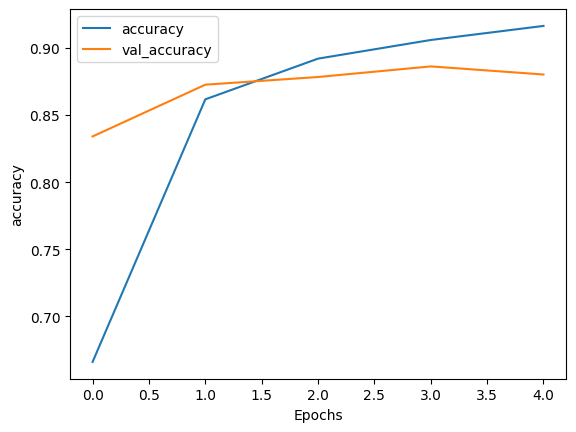

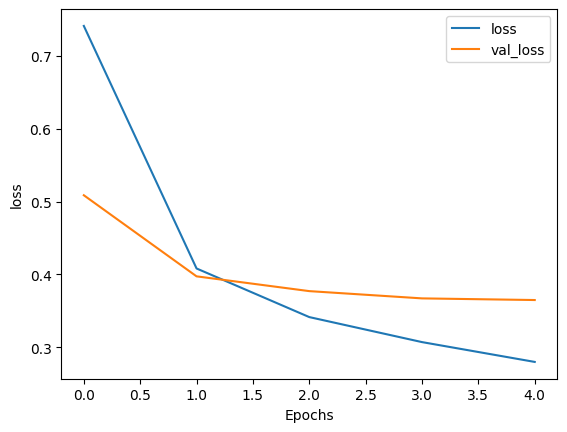

In [31]:
plot_graphs(history1, "accuracy")
plot_graphs(history1, "loss")